In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
apple = pd.read_csv('C:\\Users\\HP\\Desktop\\AAPL.csv')

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4340 non-null   object 
 1   Open       4340 non-null   float64
 2   High       4340 non-null   float64
 3   Low        4340 non-null   float64
 4   Close      4340 non-null   float64
 5   Adj Close  4340 non-null   float64
 6   Volume     4340 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 237.5+ KB


In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [5]:
print(f'dataframe contains stock prices between {apple.Date.min()} {apple.Date.max()}')
print(f'total days {(apple.Date.max() - apple.Date.min()).days}')

dataframe contains stock prices between 2006-11-03 00:00:00 2024-02-02 00:00:00
total days 6300


In [6]:
apple.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4340,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4.340000e+03
mean,2015-06-19 23:18:31.520737280,50.481657,51.027817,49.958713,50.518274,48.754494,3.595753e+08
min,2006-11-03 00:00:00,2.791071,2.840357,2.741786,2.792857,2.367448,2.404830e+07
25%,2011-02-27 06:00:00,11.998750,12.081429,11.885000,11.999732,10.171930,1.026461e+08
50%,2015-06-20 12:00:00,26.865001,27.136251,26.588750,26.870001,24.426986,2.041768e+08
75%,2019-10-10 06:00:00,57.558126,58.157502,56.868751,57.370625,55.587277,4.903927e+08
max,2024-02-02 00:00:00,198.020004,199.619995,197.000000,198.110001,198.110001,3.372970e+09
std,NaN,55.151310,55.762921,54.591717,55.210392,55.381039,3.713727e+08


<Axes: >

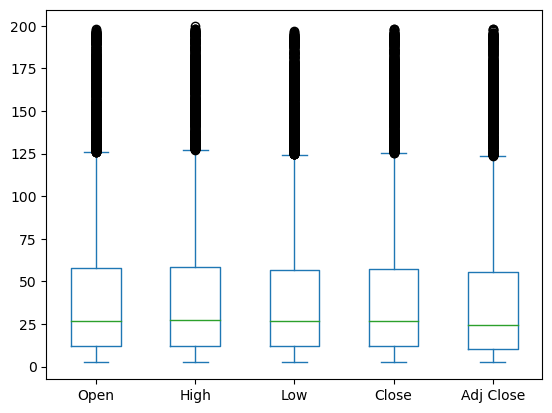

In [7]:
apple[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
layout = go.Layout(
    title='Stock Prices of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#1f77b4" 
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#1f77b4"  
        )
    )
)
apple_data = [{'x': apple['Date'], 'y': apple['Close']}]
plot = go.Figure(data=apple_data, layout=layout)

In [20]:
iplot(plot)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
X= np.array(apple.index).reshape(-1,1)
Y= apple['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
  x=X_train.T[0],
  y=Y_train,
  mode= 'markers',
  name= 'Actual'
)
trace1= go.Scatter(
   x=X_train.T[0],
   y=lm.predict(X_train).T,
    mode= 'lines',
    name= 'Predicted'
)
apple_data= [trace0,trace1]
layout.xaxis.title.text= 'Day'
plot2= go.Figure(data=apple_data, layout=layout)

In [21]:
iplot(plot2)

In [17]:
scores = f"""
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
"""

print(scores)


Metric           Train                Test        
r2_score  0.7488756712878712	0.7486419081453475
MSE       759.0396773636968	780.6214470612878

